<a href="https://colab.research.google.com/github/tztechno/cc_archive/blob/main/Colab_GDrive_Marathon_Bib_Mosaic_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab_GDrive Marathon Bib Mosaic YOLOv8
https://docs.ultralytics.com/tasks/pose/
https://www.kaggle.com/code/stpeteishii/tokyo-marathon-pose-yolov8

In [40]:
!rm -rf images
!rm -rf runs
!rm -rf yolov8_pose
!rm *

rm: cannot remove 'drive': Is a directory
rm: cannot remove 'sample_data': Is a directory


In [41]:
!ls

drive  sample_data


In [42]:
!pip install ultralytics

In [43]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from IPython.display import Video
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [44]:
#!mkdir images

In [45]:
from google.colab import drive
import os

drive.mount('/content/drive')
input_folder = '/content/drive/MyDrive/images/myimage'
dest = '/content/drive/MyDrive/images/input'
dest2 = '/content/drive/MyDrive/images/output'

paths0 = []
for dirname, _, filenames in os.walk(input_folder):
    for filename in filenames:
        paths0.append(os.path.join(dirname, filename))

for i,path in enumerate(paths0):
    shutil.copy(path,os.path.join(dest,f'{i:02d}.png'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
paths=[]
for dirname, _, filenames in os.walk(dest):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]

paths.sort()
print(paths)

['/content/drive/MyDrive/images/input/00.png', '/content/drive/MyDrive/images/input/01.png', '/content/drive/MyDrive/images/input/02.png', '/content/drive/MyDrive/images/input/03.png', '/content/drive/MyDrive/images/input/04.png', '/content/drive/MyDrive/images/input/05.png']


In [47]:
!yolo pose predict model=yolov8x-pose.pt source={dest} show_boxes=False save_txt=True conf=0.8

100% 133M/133M [00:00<00:00, 200MB/s]
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 287 layers, 69,462,204 parameters, 0 gradients, 263.2 GFLOPs

image 1/6 /content/drive/MyDrive/images/input/00.png: 384x640 7 persons, 68.4ms
image 2/6 /content/drive/MyDrive/images/input/01.png: 384x640 5 persons, 45.7ms
image 3/6 /content/drive/MyDrive/images/input/02.png: 384x640 3 persons, 45.8ms
image 4/6 /content/drive/MyDrive/images/input/03.png: 384x640 7 persons, 40.2ms
image 5/6 /content/drive/MyDrive/images/input/04.png: 384x640 9 persons, 38.8ms
image 6/6 /content/drive/MyDrive/images/input/05.png: 384x640 6 persons, 38.8ms
Speed: 2.3ms preprocess, 46.3ms inference, 107.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/pose/predict
6 labels saved to runs/pose/predict/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [48]:
output_path =  '/content/runs/pose/predict'

opaths=[]
tpaths=[]
for dirname, _, filenames in os.walk(output_path):
    for filename in filenames:
        path=(os.path.join(dirname, filename))
        if filename.endswith('.jpg'):
            opaths+=[path]
        else:
            tpaths+=[path]

opaths.sort()
tpaths.sort()
print(opaths)
print(tpaths)

['/content/runs/pose/predict/00.jpg', '/content/runs/pose/predict/01.jpg', '/content/runs/pose/predict/02.jpg', '/content/runs/pose/predict/03.jpg', '/content/runs/pose/predict/04.jpg', '/content/runs/pose/predict/05.jpg']
['/content/runs/pose/predict/labels/00.txt', '/content/runs/pose/predict/labels/01.txt', '/content/runs/pose/predict/labels/02.txt', '/content/runs/pose/predict/labels/03.txt', '/content/runs/pose/predict/labels/04.txt', '/content/runs/pose/predict/labels/05.txt']


In [49]:
# [class_id] [x_center] [y_center] [width] [height] [keypoint_1_x] [keypoint_1_y] [keypoint_1_conf] ... [keypoint_n_x] [keypoint_n_y] [keypoint_n_conf]

for path in tpaths:
    with open(path, 'r', encoding='utf-8') as file:
        content = file.read()
        print(content)

0 0.43776 0.462963 0.352604 0.837037 0.456553 0.193733 0.994089 0.477067 0.166539 0.980658 0.434718 0.164794 0.982311 0.50286 0.217184 0.828261 0.40483 0.216194 0.878094 0.555708 0.433171 0.988934 0.35281 0.442916 0.993442 0.59235 0.711857 0.913447 0.291326 0.737615 0.954681 0.553092 0.846709 0.89402 0.384165 0.880656 0.944726 0.534186 0.920425 0.73586 0.399299 0.933143 0.766287 0 0 0.0380791 0 0 0.0465028 0 0 0.00476885 0 0 0.00499351
0 0.825 0.641667 0.142708 0.709259 0.825411 0.362031 0.995165 0.835523 0.347411 0.993362 0.816853 0.346523 0.984059 0.850135 0.357097 0.920754 0.804685 0.355197 0.720384 0.870837 0.462396 0.996399 0.780765 0.458869 0.996364 0.881605 0.599182 0.982937 0.767181 0.59715 0.980458 0.886125 0.723096 0.978999 0.776007 0.722147 0.973551 0.851283 0.716481 0.990704 0.792124 0.714508 0.990777 0.845893 0.908456 0.83118 0.782149 0.90507 0.822621 0 0 0.175435 0 0 0.173182
0 0.0989583 0.618519 0.161458 0.762963 0.113554 0.352707 0.993587 0.122955 0.332199 0.964339 0.10

In [50]:
def parse_pose_data(lines):
    """
    Function to extract position information of each body part from multiple lines of YOLOv8 Pose output.
    Args:
        lines (list of str): A list of output lines from YOLOv8.
    Returns:
        list of dict: A list of dictionaries, each containing body part positions for a line of output.
                      If a body part is not detected, its value will be None.
    """
    # COCO body part names (17-point format)
    keypoint_names = [
        "nose", "left_eye", "right_eye", "left_ear", "right_ear",
        "left_shoulder", "right_shoulder", "left_elbow", "right_elbow",
        "left_wrist", "right_wrist", "left_hip", "right_hip",
        "left_knee", "right_knee", "left_ankle", "right_ankle"
    ]

    # Result list to store the parsed data for each line
    parsed_results = []

    for line in lines.splitlines():

        # Parse the data from each line
        data = list(map(float, line.strip().split()))

        # Class ID (the first value)
        class_id = int(data[0])

        # Bounding box (next 4 values)
        bbox = {
            "x_center": data[1],
            "y_center": data[2],
            "width": data[3],
            "height": data[4]
        }

        # Body part information (from the 5th value onward)
        keypoints = data[5:]

        # Convert keypoint information to a dictionary
        result = {name: None for name in keypoint_names}
        keypoint_index = 0

        for name in keypoint_names:
            if keypoint_index < len(keypoints):
                # If not detected, the data will be "0"
                if keypoints[keypoint_index] == 0:
                    result[name] = None
                    keypoint_index += 3  # Skip one set (for undetected keypoints)
                else:
                    # If detected, store the (x, y, confidence)
                    x = keypoints[keypoint_index]
                    y = keypoints[keypoint_index + 1]
                    conf = keypoints[keypoint_index + 2]
                    result[name] = (x, y, conf)
                    keypoint_index += 3  # Move ahead by three values (x, y, confidence)

        # Append the result for this line
        parsed_results.append({"class_id": class_id, "bbox": bbox, "keypoints": result})

    return parsed_results

In [51]:
def calculate_bounding_box(keypoints, part1, part2):
    """
    Function to calculate a bounding box based on two body parts.
    Args:
        keypoints (dict): A dictionary with body part names as keys and (x, y, confidence) as values.
        part1 (str): The name of the first body part to be used in the bounding box.
        part2 (str): The name of the second body part to be used in the bounding box.
    Returns:
        dict: A dictionary representing the bounding box (x_min, y_min, x_max, y_max) or None if either part is not detected.
    """
    # Retrieve the coordinates for part1 and part2
    part1_data = keypoints.get(part1)
    part2_data = keypoints.get(part2)

    # If either part is not detected (None), return None
    if part1_data is None:
        print(f"{part1} is not detected.")
        return None
    if part2_data is None:
        print(f"{part2} is not detected.")
        return None

    # Extract coordinates (x, y)
    x1, y1, _ = part1_data
    x2, y2, _ = part2_data

    # Calculate the bounding box by finding the min/max x and y values
    x_min = min(x1, x2)
    y_min = min(y1, y2)
    x_max = max(x1, x2)
    y_max = max(y1, y2)

    return {"x_min": x_min, "y_min": y_min, "x_max": x_max, "y_max": y_max}

In [52]:
RESULTS=[]
for path in tpaths:
    with open(path, 'r', encoding='utf-8') as file:
        content = file.read()
        results = parse_pose_data(content)
        RESULTS+=[results]
        print(len(results))

7
5
3
7
9
6


In [53]:
BOX=[]
for results in RESULTS:
    boxes=[]
    for result in results:
        # Retrieve Keypoints
        keypoints = result["keypoints"]

        # Bounding box for left shoulder and right hip
        box_left_shoulder_right_hip = calculate_bounding_box(keypoints, "left_shoulder", "right_hip")
        if box_left_shoulder_right_hip is not None:
            print("Bounding box for left shoulder and right hip:", box_left_shoulder_right_hip)
            boxes+=[box_left_shoulder_right_hip]
        else:
            print("Bounding box for left shoulder and right hip not detected.")

        # Bounding box for right shoulder and left hip
        box_right_shoulder_left_hip = calculate_bounding_box(keypoints, "right_shoulder", "left_hip")
        if box_right_shoulder_left_hip is not None:
            print("Bounding box for right shoulder and left hip:", box_right_shoulder_left_hip)
            boxes+=[box_right_shoulder_left_hip]
        else:
            print("Bounding box for right shoulder and left hip not detected.")
    BOX+=[boxes]

Bounding box for left shoulder and right hip: {'x_min': 0.399299, 'y_min': 0.433171, 'x_max': 0.555708, 'y_max': 0.933143}
Bounding box for right shoulder and left hip: {'x_min': 0.35281, 'y_min': 0.442916, 'x_max': 0.534186, 'y_max': 0.920425}
Bounding box for left shoulder and right hip: {'x_min': 0.792124, 'y_min': 0.462396, 'x_max': 0.870837, 'y_max': 0.714508}
Bounding box for right shoulder and left hip: {'x_min': 0.780765, 'y_min': 0.458869, 'x_max': 0.851283, 'y_max': 0.716481}
Bounding box for left shoulder and right hip: {'x_min': 0.0660321, 'y_min': 0.439771, 'x_max': 0.149399, 'y_max': 0.7028}
Bounding box for right shoulder and left hip: {'x_min': 0.0536605, 'y_min': 0.439588, 'x_max': 0.13056, 'y_max': 0.700732}
Bounding box for left shoulder and right hip: {'x_min': 0.669399, 'y_min': 0.463996, 'x_max': 0.739116, 'y_max': 0.699838}
Bounding box for right shoulder and left hip: {'x_min': 0.655277, 'y_min': 0.463872, 'x_max': 0.724499, 'y_max': 0.700313}
Bounding box for l

In [54]:
def get_middle_bbox(x0, y0, x1, y1):
    """
    Given a bounding box (x0, y0, x1, y1), this function divides it into three equal parts along the y-axis
    and returns the coordinates of the middle part of the bounding box.

    Args:
        x0 (float): The x-coordinate of the top-left corner of the bounding box.
        y0 (float): The y-coordinate of the top-left corner of the bounding box.
        x1 (float): The x-coordinate of the bottom-right corner of the bounding box.
        y1 (float): The y-coordinate of the bottom-right corner of the bounding box.

    Returns:
        tuple: The coordinates of the middle bounding box (x0_new, y0_new, x1_new, y1_new).
    """
    # Height of the bounding box
    height = max(y0,y1) - min(y0,y1)

    # Calculate the middle position by dividing the height into three equal parts
    middle_start = int(y0 + height/4)
    middle_end = int(y0 + 3*(height/4))

    # Return the coordinates of the new bounding box
    return (x0 - 5, middle_start, x1 + 5, middle_end)

In [55]:
def mosaic(src, ratio=0.05):
    small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

1.0


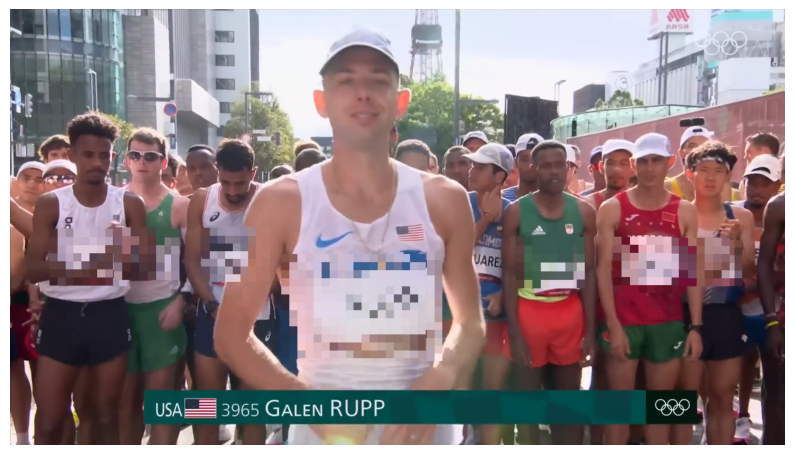

1.0


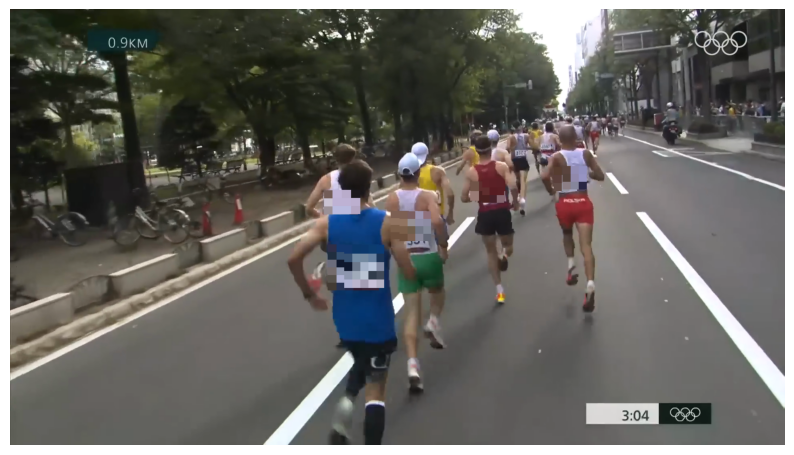

1.0


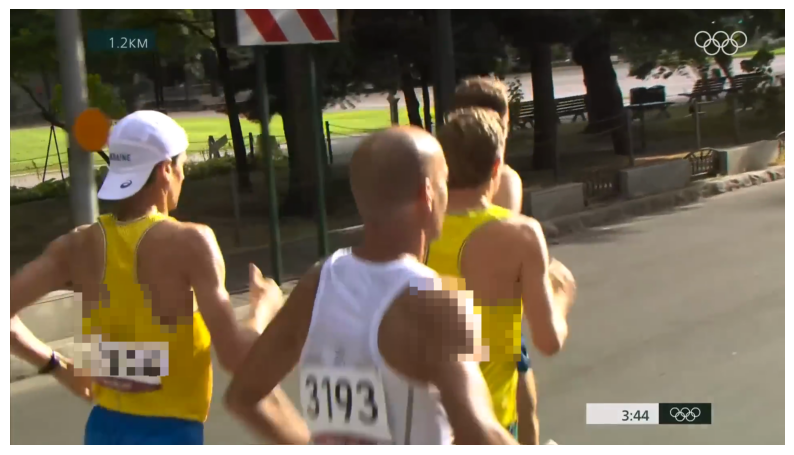

1.0


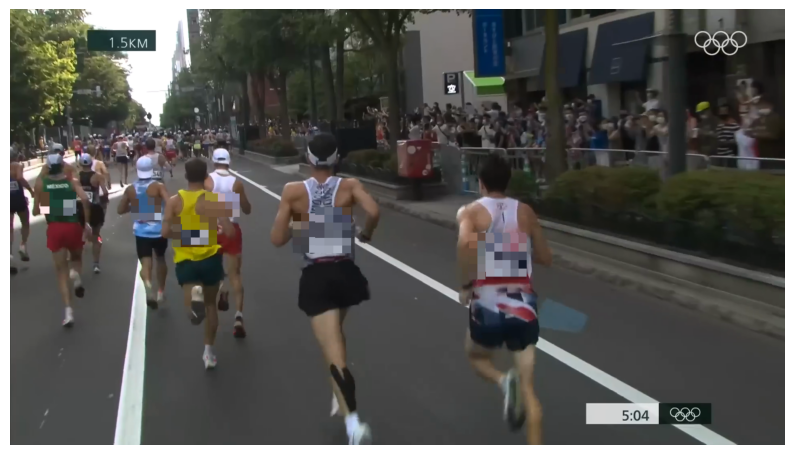

1.0


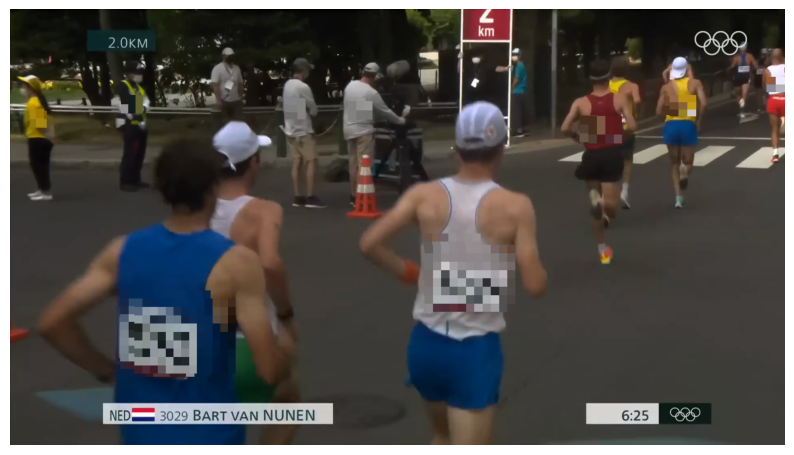

1.0


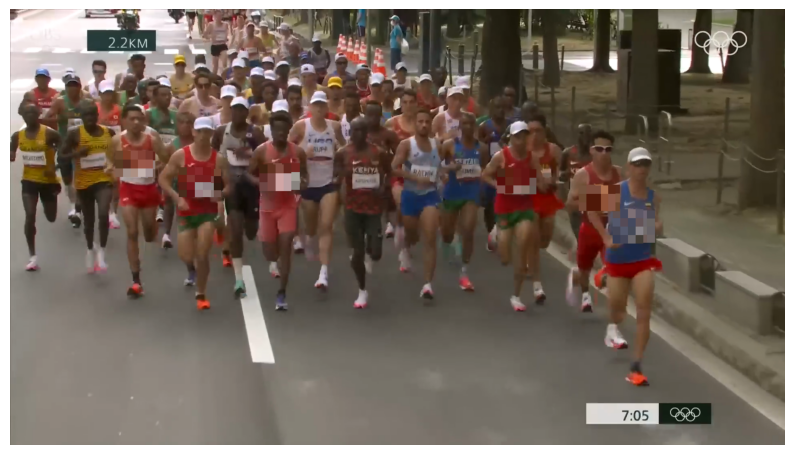

In [56]:
for i,boxes in enumerate(BOX):
    path=paths[i]
    image2=plt.imread(path)
    H,W=image2.shape[0:2]
    print(image2.flatten().max())

    for box in boxes:
        try:
            x0, y0, x1, y1 = int(box['x_min']*W),int(box['y_min']*H),int(box['x_max']*W),int(box['y_max']*H)
            x2, y2, x3, y3 = get_middle_bbox(x0, y0, x1, y1)
            #print(x2,y2,x3,y3)
            #cv2.rectangle(image2,(x2,y2),(x3,y3),(255,0,0),3)
            mosaic_image=mosaic(image2[y2:y3,x2:x3])
            image2[y2:y3,x2:x3]=mosaic_image
        except:
            pass

    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(image2)
    plt.show()

    output_path = f"{dest2}/m{path.split('/')[-1]}"
    image2=cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    cv2.imwrite(output_path, image2*255)

In [59]:
from PIL import Image
frames = [Image.open(path) for path in opaths]
frames[0].save(
    f"{dest2}/animation.gif",
    save_all=True,
    append_images=frames[1:],
    duration=1000,
    loop=0
)
output_path=f"{dest2}/animation.gif"

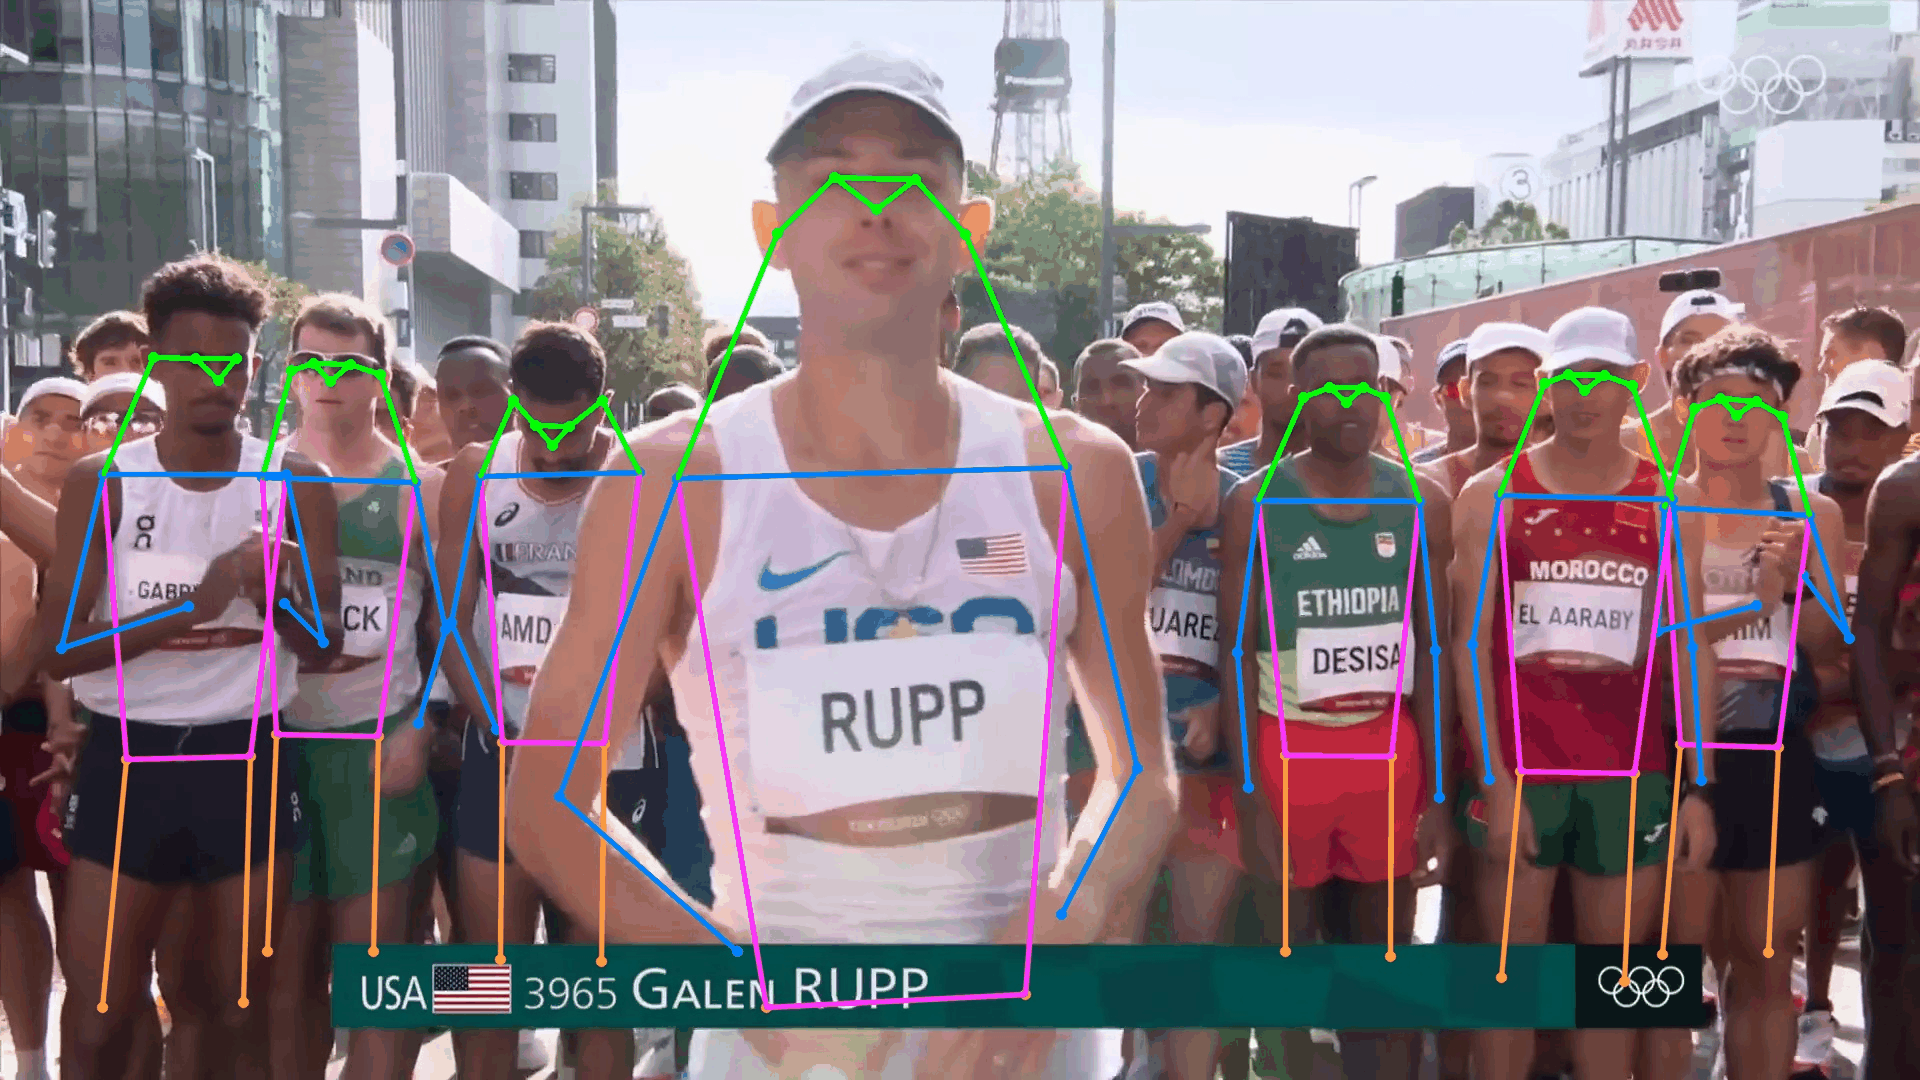

In [60]:
from IPython.display import Image
Image(open(output_path, 'rb').read())